<a href="https://colab.research.google.com/github/siawtchin24/WMU-102-Group-Project-Machine-Learning/blob/main/Copy_of_Prediction_on_Infection_Risk_of_Lung_Cancer_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Prediction on Infection Risk of Lung Cancer with Machine Learning**

##**Introduction**##
**Lung cancer**, sometimes known as lung carcinoma, since about 98–99 percent of all lung cancers are carcinomas, is a malignant lung tumour characterised by uncontrolled cell proliferation in lung tissues. Other types of lung cancer, such as the uncommon sarcomas of the lung, are caused by the malignant transformation of connective tissues (nerve, fat, muscle, and bone) that derived from mesenchymal cells. As of 2020, lung cancer occurred in 2.2 million people and resulted in 1.8 million deaths. It is the most common cause of cancer-related death in men and second-most common in women after breast cancer. (source: https://en.wikipedia.org/wiki/Lung_cancer)

**Data analytics and machine learning** play an important role in studying huge datasets to find hidden trends or information from the data and predict outcomes accordingly. In this project, we have proposed a few lung cancer prediction models and compare their accuracy for better classification of lung cancer based on a few factors including age, gender, air pollution level, frequency of alcohol use per week, dust allergy level, level of occupational hazards, genetic risk, chronic lung disease level, frequency of balanced diet per week, obesity level, frequency of smoking per day, the frequency of being passive smokers per week, frequency of chest pain per day, frequency of coughing of blood per week, fatigue level, the total weight loss per month, frequency of shortness of breath per week, wheezing level, frequency of swallowing difficulty per week, level of clubbing of finger nails, the number of frequent cold, frequency of dry cough per day, and frequency of snoring per day. 







For this machine learning project, we choose a dataset from the medical domain, **lung cancer**. We build this machine learning model to **predict the level of lung cancer of a patient** by interpreting the variables given.

Steps:
1.	Import Necessary Libraries
2.	Read In and Explore the Data
3.	Data Analysis
4.  Data Visualization
5.	Choosing the Best Model
6.	Discussion
7.  Conclusion

##**1. Import necessary Libraries**
Firstly, we need to import necessary libraries such as pandas, numpy, and seaborn.

In [ ]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Next, we upload the dataset: cancer patient data sets.xlsx

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cancer patient data sets.xlsx to cancer patient data sets.xlsx


##**2. Read in and Explore the Data**
It is time to read in our training and testing data using pd.read_excel and take a first look at the training data using the describe function, df().


In [ ]:
df = pd.read_excel('cancer patient data sets.xlsx')

In [ ]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


**Dataset:**
Dataset of lung cancer, taken from data.world: https://data.world/cancerdatahp/lung-cancer-data

Description obtained from the dataset source is unclear, hence, we define the variables given based on common sense and similar datasets of lung cancer.

The features above are used to predict the infection risk of lung cancer:
* Age: Age (year)
* Gender: Gender of patient
* Air pollution: The level of air pollution
* Alcohol use: The frequency of alcohol use per week
* Dust allergy: To what extent they are allergic to dust
* Occupational hazards: The level of occupational hazards
* Genetic risk: The risk of getting lung cancer due to genetic	
* Chronic lung disease: The level of chronic lung disease
* Balanced diet: The frequency of balanced diet per week
* Obesity: Obesity level
* Smoking: The frequency of smoking per day
* Passive smoker: The frequency of being passive smoker per week
* Chest pain: The frequency of chest pain per day
* Coughing of blood: The frequency of coughing of blood per day
* Fatigue: The level of tiredness
* Weight loss: The total weight loss per month
* Shortness of breath: The frequency of shortness of breath per week
* Wheezing: The frequency of wheezing per day
* Swallowing difficulty: The difficulty of swallowing
* Clubbing of finger nails: The level of clubbing of finger nails
* Frequent cold: The number of frequent cold per week
* Dry cough: The frequency of dry cough per day
* Snoring: The frequency of snoring per day
* Level: The infection risk of lung cancer (Low; Medium; High)

  **1=Lowest;10=Highest**

In [ ]:
df.describe(include=[np.number])

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


There are a total of 1000 patients in our dataset. 

1. **Air Pollution**:The air quality in Malaysia is considered moderately unsafe, which the most recent data indicates the country's annual mean concentration of PM2.5 is 16 µg/m3, that exceeds the recommended maximum of 10 µg/m3. (source: https://www.iamat.org/country/malaysia/risk%20air-pollution#:~:text=In%20accordance%20with%20the%20World,maximum%20of%2010%20%C2%B5g%2Fm3.)

2. **Genetic Risk**: According to the dataset, there are 32.7% of patients who detected as high level of developing lung cancer. This is because they inherit DNA mutations from their parents that greatly increase their risk of developing lung cancer. (source: https://www.cancer.org/cancer/lung-cancer/causes-risks-prevention/what-causes.html)

3. **chronic Lung Disease**: It is well known that chronic lung disease is a significant risk factor for lung cancer. Approximately 1% of chronic lung disease patients develop lung cancer every year. (source: https://erj.ersjournals.com/content/39/5/1230)

4. **Smoking**: According to the dataset, there are 29.6% of patients who smoke up to 7 or more times per day which indicates as frequent smokers.

5. **Passive smoker**: Passive smokers who are exposed to secondhand smoke at home or at work increase their risk of developing lung cancer by 20–30%. (Source:https://www.cdc.gov/tobacco/data_statistics/fact_sheets/secondhand_smoke/health_effects/index.htm)

6. **Wheezing**: According to the dataset, 38.8% of patients are suffering from serious wheezing by having more than 5 times and above. Shortness of breath or becoming easily winded are also possible symptoms of lung cancer. (Source: https://www.healthline.com/health/lung-cancer/early-signs#:~:text=2.-,Breathing%20changes%20or%20wheezing,winded%20or%20short%20of%20breath.)

7. **Dry cough**:According to the dataset, there are 38.8% of patients who suffer from 5 or more times dry cough everyday.




**Note!!**

This can be considered as a **balance dataset** since the ratio for 'Level' is quite equal with the ratio 1:1:1. Next, no numbers are fallen out of the range, instead, all of them are inside the range between minimum and maximum. 

(Therefore, **oversampling or undersampling** of data is not required.)

##**3. Data Analysis**
We are going to consider the features in the dataset and how complete they are.


Numerical features : Age (Discrete), Gender (Discrete), Air Pollution (Discrete), Alcohol use (Discrete), Dust Allergy (Discrete), OccuPational Hazards (Discrete), Genetic Risk (Discrete), chronic Lung Disease (Discrete), Balanced Diet (Discrete), Obesity (Discrete), Smoking (Discrete), Passive Smoker(Discrete), Chest Pain (Discrete), Coughing of Blood (Discrete), Fatigue(Discrete), Weight Loss (Discrete), Shortness of Breath (Discrete), Wheezing(Discrete), Swallowing Difficulty (Discrete), Clubbing of Finger Nails (Discrete), Frequent Cold (Discrete), Dry Cough (Discrete), Snoring(Discrete)

What are the data types for each feature?
*	Age : int64
*	Gender : int64
*	Air Pollution : int64
*	Alcohol use : int64
*	Dust Allergy : int64
*	OccuPational Hazards : int64
*	Genetic Risk : int64
*	chronic Lung Disease : int64
*	Balanced Diet: int64
*	Obesity : int64
*	Smoking : int64
*	Passive Smoker : int64
*	Chest Pain : int64
*	Coughing of Blood : int64
*	Fatigue : int64
*	Weight Loss : int64
*	Shortness of Breath : int64
*	Wheezing : int64
*	Swallowing Difficulty : int64
*	Clubbing of Finger Nails : int64
*	Frequent Cold : int64
* Dry Cough : int64
*	Snoring : int64

All the features data type is int64, discrete variables are usually for the int type. 


In [ ]:
print(df.columns)

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [ ]:
#check for any other unusable values
print(pd.isnull(df).sum())

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


The dataset is complete and no cleaning process is necessary. 

##**4.  Data Visualization**

Some predictions are made : 

*	The age and gender of patient will not affect the infection risk of lung cancer.
*	The patients who live in area with high air pollution are predicted to have higher level infection risk of lung cancer.
*	The alcohol use of patient does not really affect the infection risk of lung cancer.
*	The patients who are allergic to dust does not really affect the infection risk of lung cancer.
*	The occupational hazards does not really affect the infection risk of lung cancer.
*	The patients with higher genetic risk does not really affect the infection risk of lung cancer.
* The patients with chronic lung disease does not really affect the infection risk of lung cancer.
*	Balanced diet of patient does not really affect the infection risk of lung cancer.
* The patient with higher obesity level will have higher infection risk of lung cancer.
* Smoking does not really affect the infection risk of lung cancer.
* The patients who are passive smokers are more likely to have high level infection risk of lung cancer.
* Chest pain does not really affect the infection risk of lung cancer.
* Coughing of blood does not really affect the infection risk of lung cancer.
* The patient with higher level of tiredness will have higher infection risk of lung cancer.
* The total weight loss of patient does not really affect the infection risk of lung cancer.
* The patients with higher frequency of shortness of breath are more likely to have high level infection risk of lung cancer.
* The patients with higher frequency of wheezing are more likely to have high level infection risk of lung cancer.
* Difficulty swallowing of patient does not really affect the infection risk of lung cancer.
* The patients with higher level of clubbing of finger nails are more likely to have high level infection risk of lung cancer.
* The patient with higher number of frequent cold will have higher infection risk of lung cancer.
* Dry cough does not really affect the infection risk of lung cancer.
* The patient with higher frequency of snoring will have higher infection risk of lung cancer.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

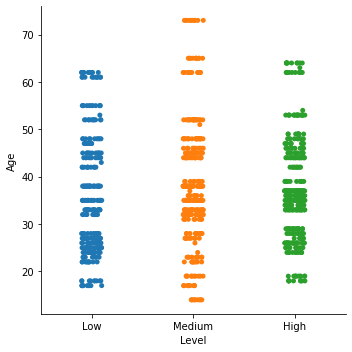

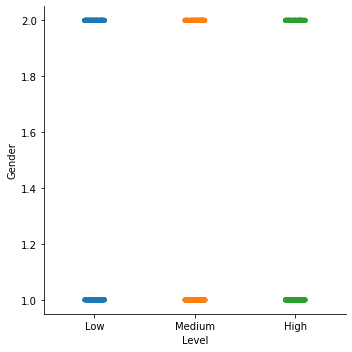

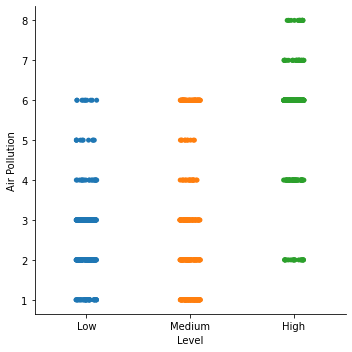

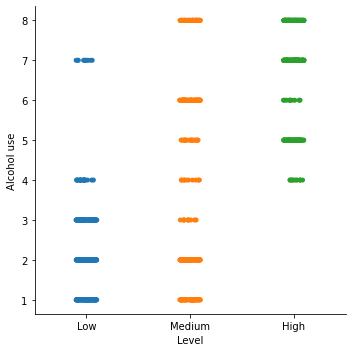

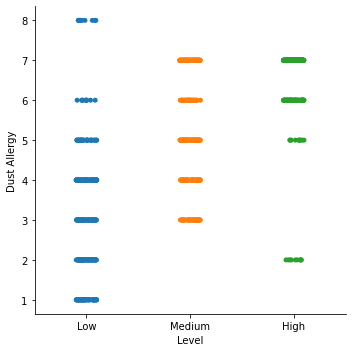

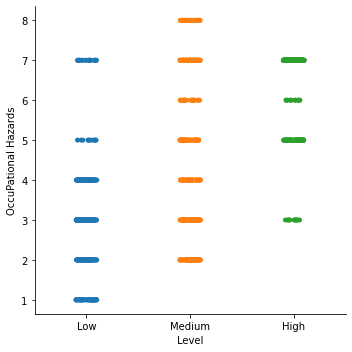

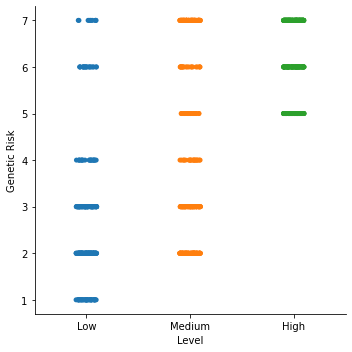

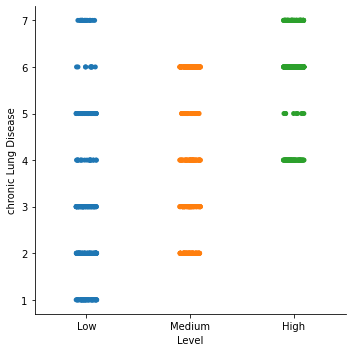

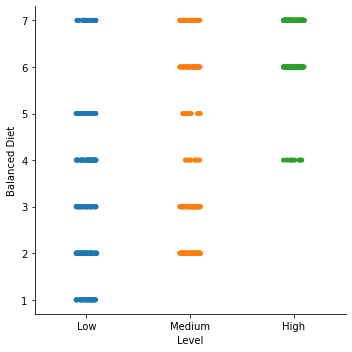

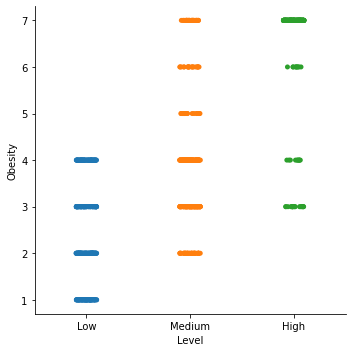

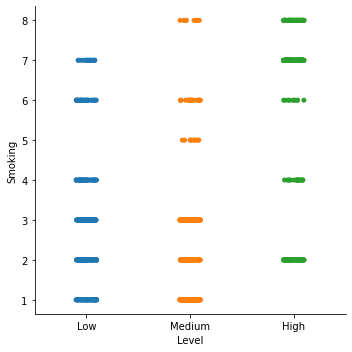

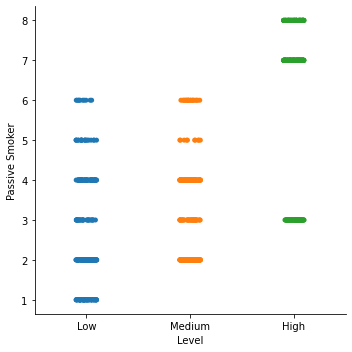

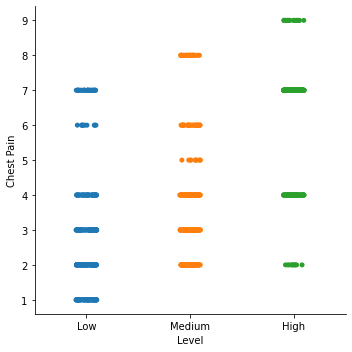

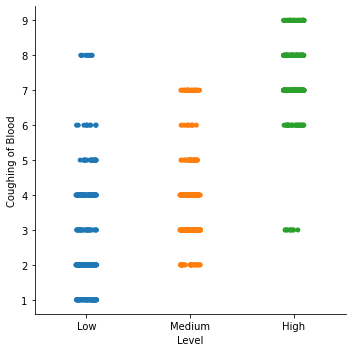

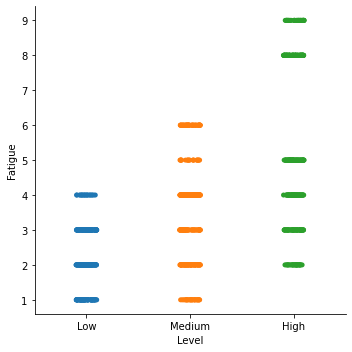

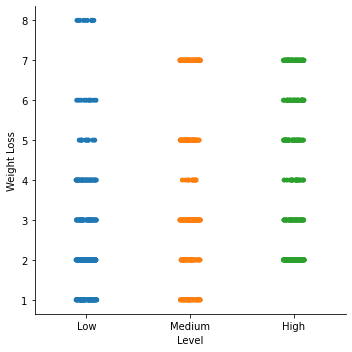

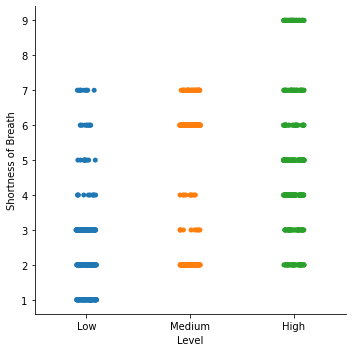

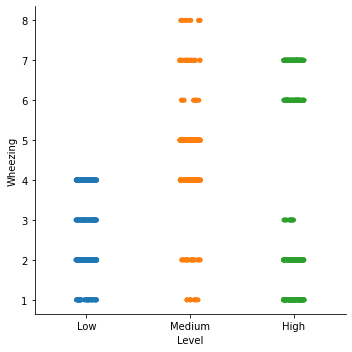

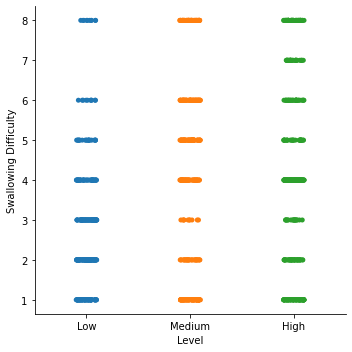

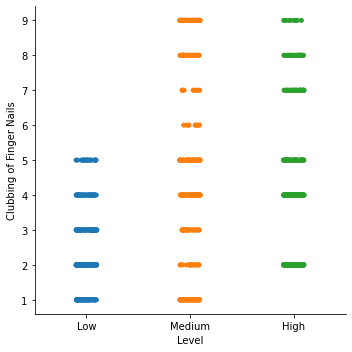

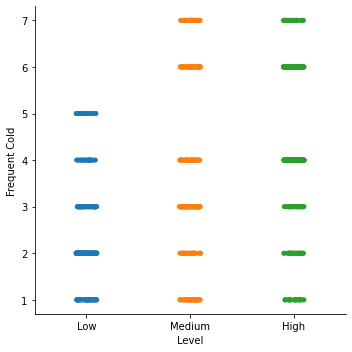

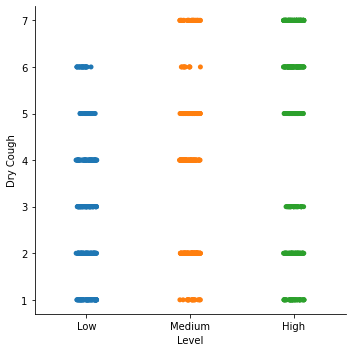

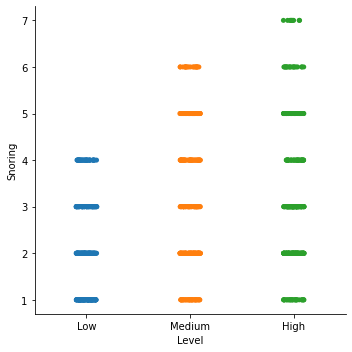

In [ ]:
#This is used to visualize our data and to check whether our predictions are accurate.
for col in df.columns:
  if col != "Level":
      sns.catplot("Level", col, 
               data = df)


**Age:**
From the graph, the number of dots for all the levels are almost the same. This shows that the infection risk of lung cancer will not be affected by age. The prediction is true.

**Gender:**
From the graph, the number of dots for all the levels are almost the same. This shows that the infection risk of lung cancer will not be affected by gender. The prediction is true.

**Air pollution:**
From the graph, the number of green dots are more than both orange and blue dots at level 7 and 8 of air pollution. This shows that the more serious the air pollution, the higher the infection risk of lung cancer. The prediction is true.

**Alcohol use:**
From the graph, there are blue dots occur at 7 which shows that alcohol use does not really affect the infection risk of lung cancer. The prediction is true. 

**Dust Allergy:**
From the graph, there are blue dots occur at 8 which shows that dust allergy does not really affect the infection risk of lung cancer. The prediction is true.

**Occupational hazards:**
From the graph, all of the dots occur around level 7 and 8 of occupational hazards. This shows that occupational hazards do not really affect the infection risk of lung cancer. The prediction is true. 

**Genetic risk**
From the graph, the number of dots for all the levels are almost the same. This shows that the infection risk of lung cancer will not be affected by genetic risk. The prediction is true.

**Chronic lung disease**
From the graph, the number of dots for all the levels are almost the same. This shows that the infection risk of lung cancer will not be affected by chronic lung disease. The prediction is true.

**Balanced diet**
From the graph, the number of dots for all the levels are almost the same. This shows that the infection risk of lung cancer will not be affected by balanced diet. The prediction is true.

**Obesity**
From the graph, orange and green dots occur at level from 5 to 7. This shows that higher obesity level, the patient is more likely to infect with lung cancer. The prediction is true.

**Smoking**
From the graph, the number of dots for all the levels are almost the same. This shows that smoking does not really affect the infection risk of lung cancer. The prediction is true.

**Passive smoker**
From the graph, the number of green dots are more than blue and orange dots at the frequency of 7 and 8. This shows that the higher the frequency of being a passive smoker, the higher the infection risk of lung cancer. The prediction is true.

**Chest pain**
From the graph, all the dots occur at higher frequency of chest pain. This shows that chest pain does not really affect the infection risk of lung cancer. The prediction is true.

**Coughing of blood**
From the graph, all the dot occur at frequency above 7 which shows that coughing of blood does not really affect the infection risk of lung cancer. The prediction is true.

**Fatigue**
From the graph, the number of green dots occur more at level of 8 and 9. This shows that patient with highler level of tiredness is more likely to infect with lung cancer. The prediction is true.

**Weight loss**
From the graph, there are blue dots occur at number of 8 which shows that the the total weight loss will not affect the infection risk of lung cancer. The prediction is true.

**Shortness of breath**
From the graph, the number of green dots are more than blue and orange dots occur at frequency of 8 which shows that shortness of breath affect the infection risk of lung cancer. The prediction is true.

**Wheezing**
From the graph, the number of orange and green dots are more than blue dots at frequency of 4 and above. This shows that the patient has medium level and above to infect with lung cancer. The prediction is true.

**Swallowing difficulty**
From the graph, the number of dots for all the levels are almost the same. This shows that the infection risk of lung cancer will not be affected by swallowing difficulty. The prediction is true.

**Clubbing of finger nails**
From the graph, the number of orange and green dots are more than blue dots at frequency of 5 and above. This shows that the patient has medium level and above to infect with lung cancer. The prediction is true.

**Frequent cold**
From the graph, the number of orange and green dots are more than blue dots at frequency of 6 and above. This shows that the patient has medium level and above to infect with lung cancer. The prediction is true.

**Dry cough**
From the graph, the number of dots for all the levels are almost the same. This shows that the infection risk of lung cancer will not be affected by dry cough. The prediction is true.

**Snoring**
From the graph, the number of orange and green dots are more than blue dots at frequency of 5 and above. This shows that the patient has medium level and above to infect with lung cancer. The prediction is true.

The results shown same with the assumptions we made before. Thus, there is no data cleaning required.

##**5. Choosing the Best Model**
**Testing Different Models**

Supervised learning uses a training set to teach models to yield the desired output. Classification uses an algorithm to accurately assign test data into specific categories (source: https://www.ibm.com/cloud/learn/supervised-learning).

We will be testing the following models with our training data:
* KNN or k-Nearest Neighbors
* Decision Tree Classifier
* Gaussian Naive Bayes


Now, we split the dataset into training and test set.

In [ ]:
X= df.drop(['Level'],axis=1)

In [ ]:
X

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,7,8,7,7,5,3,2,7,8,2,4,5,3
996,37,2,6,8,7,7,7,6,7,7,7,8,7,7,9,6,5,7,2,4,3,1,4
997,25,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2
998,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3


In [ ]:
y=df['Level']

In [ ]:
y

0         Low
1      Medium
2        High
3        High
4        High
        ...  
995      High
996      High
997      High
998      High
999      High
Name: Level, Length: 1000, dtype: object

In [ ]:
#Import Module
# We create our training and testing datasets with a train_test_split method
# At the moment train set size will be 80% of the data and test set size 20%
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=122)

In [ ]:
train_X.shape, test_X.shape

((800, 23), (200, 23))

The training set consists of 800 rows, while the test set consists of 200 rows.The ratio of training set: test set is 8:2.

In [ ]:
train_X

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
910,62,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3
936,24,2,1,2,2,3,2,4,2,3,2,1,1,1,1,1,1,2,3,4,5,2,1
933,42,1,2,1,2,3,4,3,2,1,1,1,6,2,1,1,1,2,1,2,3,1,2
713,35,1,1,3,2,4,2,6,2,2,2,1,3,4,4,2,2,2,3,2,1,2,4
449,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,18,2,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3
950,55,1,3,1,1,1,2,3,4,1,3,2,4,3,2,5,2,1,2,3,4,5,2
394,61,1,2,3,4,2,1,1,2,4,3,2,1,5,2,1,3,2,1,3,2,1,2
922,25,2,3,1,4,3,2,3,4,3,1,4,3,1,3,2,2,4,2,2,3,4,3


In [ ]:
test_X

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
389,52,1,3,2,1,2,3,5,1,2,7,2,1,1,1,1,1,3,2,3,2,3,3
105,37,2,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5
903,73,1,5,6,6,5,6,5,6,5,8,5,5,5,4,3,6,2,1,2,1,6,2
818,26,1,2,3,1,4,3,2,3,4,3,1,4,3,1,2,3,4,5,1,2,3,4
190,25,2,3,1,4,3,2,3,4,3,1,4,3,1,3,2,2,4,2,2,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,45,1,6,7,7,7,7,6,7,7,4,8,7,7,4,4,5,6,5,5,4,6,5
765,29,2,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3
22,62,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3


In [ ]:
train_y.shape, test_y.shape

((800,), (200,))

In [ ]:
train_y

910    High
936     Low
933     Low
713     Low
449    High
       ... 
332    High
950     Low
394     Low
922     Low
495     Low
Name: Level, Length: 800, dtype: object

In [ ]:
test_y

389       Low
105      High
903    Medium
818       Low
190       Low
        ...  
89       High
765      High
4        High
22       High
340       Low
Name: Level, Length: 200, dtype: object

#**KNN (k-Nearest Neighbors)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics

#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_X, train_y)
    pred_1 = knn.predict(test_X)
    scores[k] = metrics.accuracy_score(test_y, pred_1)
    scores_list.append(metrics.accuracy_score(test_y, pred_1))

In [ ]:
print("-------------------------------")
print("k-value |     Test Accuracy")
print("-------------------------------")
for a,b in zip(k_range, scores_list):
  print(a, "\t|  ", b)
print("-------------------------------")

-------------------------------
k-value |     Test Accuracy
-------------------------------
1 	|   1.0
2 	|   1.0
3 	|   0.995
4 	|   0.995
5 	|   0.995
6 	|   0.995
7 	|   0.995
8 	|   0.995
9 	|   0.995
10 	|   0.995
11 	|   0.995
12 	|   0.975
13 	|   0.975
14 	|   0.975
15 	|   0.96
16 	|   0.95
17 	|   0.93
18 	|   0.93
19 	|   0.925
20 	|   0.925
21 	|   0.925
22 	|   0.925
23 	|   0.925
24 	|   0.925
25 	|   0.925
-------------------------------


Text(0, 0.5, 'Testing Accuracy')

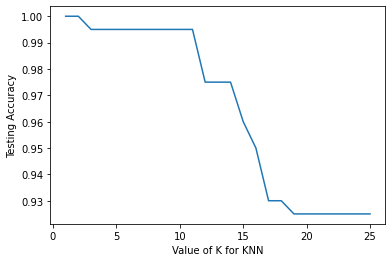

In [ ]:
#We plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

From the result, we choose **k = 3** since we opt to choose odd number with highest accuracy while excluding 1. 

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# We can ask the model to directly calculate the accuracy
knn.score(train_X, train_y)

0.99875

In [ ]:
knn.score(test_X,test_y)

0.995

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# We can also let the model predict the values for the test set
pred_1 = knn.predict(test_X)
print(pred_1[:10])

['Low' 'High' 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'High' 'Medium'
 'Medium']


In [ ]:
# And calculate the accuracy
print("Accuracy:", accuracy_score(test_y, pred_1))

Accuracy: 0.995


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_1))

Classification report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        75
         Low       1.00      0.98      0.99        61
      Medium       0.98      1.00      0.99        64

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



**Note:** 
* The **precision** will be "how many are correctly classified among that class"
* The **recall** means "how many of this class you find over the whole number of element of this class"
* The **f1-score** is the harmonic mean between precision & recall
* The **support** is the number of occurence of the given class in your dataset 

In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_1))

Confusion matrix:
[[75  0  0]
 [ 0 60  1]
 [ 0  0 64]]


KNN is a good model for the prediction. It is acceptable to give wrong prediction of labelling a low level patient as medium level patient. It is only 0.005% to get the wrong prediction.

Text(0.5, 257.44, 'Predicted label')

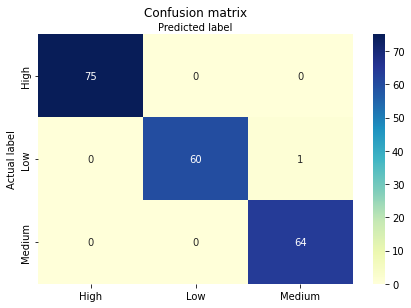

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_1)
cnf_matrix
class_names=["High","Low","Medium"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix,index=class_names,columns=class_names), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Note:**
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.

* TP: True postive
*TN: True negative
*FP: False positive
*FN: False Negative

**High Level**

* TP: Cell 1
*FP: Cell 2 + Cell 3
*TN: Cell 5 + Cell 6 + Cell 8 + Cell 9
*FN: Cell 4 + Cell 7

**Low Level**

* TP: Cell 5
*FP: Cell 4 + Cell 6
*TN: Cell 1 + Cell 3 + Cell 7 + Cell 9
*FN: Cell 2 + Cell 8

**Medium Level**

* TP: Cell 9
*FP: Cell 7 + Cell 8
*TN: Cell 1 + Cell 2 + Cell 4 + Cell 5
*FN: Cell 4 + Cell 6

#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import auc, plot_precision_recall_curve
from sklearn import metrics

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc=dtc.fit(train_X,train_y)

In [ ]:
pred_2=dtc.predict(test_X)

In [ ]:
print(pred_2[:10])

['Low' 'High' 'Medium' 'Low' 'Low' 'Medium' 'Medium' 'High' 'Medium'
 'Medium']


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_2))

Accuracy: 1.0


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_2))

Classification report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        75
         Low       1.00      1.00      1.00        61
      Medium       1.00      1.00      1.00        64

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_2))

Confusion matrix:
[[75  0  0]
 [ 0 61  0]
 [ 0  0 64]]


Text(0.5, 257.44, 'Predicted label')

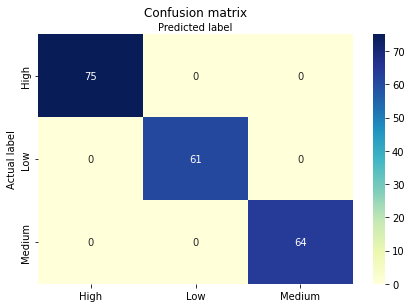

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_2)
cnf_matrix
class_names=["High","Low","Medium"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix,index=class_names,columns=class_names), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#**Naive-Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()

In [ ]:
nb.fit(train_X,train_y)

GaussianNB()

In [ ]:
pred_3=nb.predict(test_X)

In [ ]:
print(pred_3[:10])

['Low' 'High' 'High' 'Low' 'Low' 'Medium' 'High' 'High' 'Medium' 'Medium']


In [ ]:
print("Accuracy:", accuracy_score(test_y, pred_3))

Accuracy: 0.89


In [ ]:
# Report for other classification measures
print("Classification report:")
print(classification_report(test_y, pred_3))

Classification report:
              precision    recall  f1-score   support

        High       0.81      0.96      0.88        75
         Low       1.00      0.93      0.97        61
      Medium       0.91      0.77      0.83        64

    accuracy                           0.89       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.90      0.89      0.89       200



In [ ]:
# And the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(test_y, pred_3))

Confusion matrix:
[[72  0  3]
 [ 2 57  2]
 [15  0 49]]


Text(0.5, 257.44, 'Predicted label')

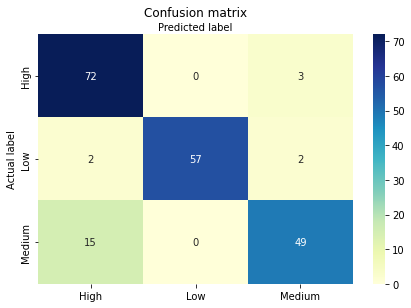

In [ ]:
cnf_matrix = metrics.confusion_matrix(test_y, pred_3)
cnf_matrix
class_names=["High","Low","Medium"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix,index=class_names,columns=class_names), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Decision Tree','Naive Bayes'],
    'Accuracy': [accuracy_score(test_y, pred_1), accuracy_score(test_y, pred_2), accuracy_score(test_y, pred_3)]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Decision Tree,1.000
0,KNN,0.995
2,Naive Bayes,0.890


#**6. Discussion**


The **K-nearest neighbour (KNN)** algorithm is one of the simplest and earliest classification algorithms. It can be thought a simpler version of an Naive Bayes (NB) classifier. Unlike the NB technique, the KNN algorithm does not require to consider probability values. The ‘K’ is the KNN algorithm is the number of nearest neighbours considered to take ‘vote’ from. We select these k nearest neighbors based on Euclidean distance. Among these k neighbours, the number of data points in each category is counted, and the new data point is assigned to that category where we got the most neighbours in.

**Decision Tree Classification** is the most powerful classifier. A Decision tree is a flowchart like a tree structure, where each internal node denotes a test on an attribute (a condition), each branch represents an outcome of the test (True or False), and each leaf node (terminal node) holds a class label. A set of decision trees are built in parallel on tractable size training data sets which are a subset of the original data. Each learned decision tree will be reduced to a set of rules, conflicting rules resolved and the resultant rules merged into one set. Results from cross validation experiments on a data set suggest this approach may be effectively applied to large sets of data.

**Naive Bayes Classifier** works on the basis of Bayes’ Theorem. The fundamental assumptions made are that all the features are independent of one another and contribute equally to the outcome; all are of equal importance. **But these assumptions are not always valid in real life** (disadvantage of Naive Bayes). It is a probabilistic classifier model whose crux is the Bayes’ theorem. From our predictions before, variables such as 'Age','Gender','Alcohol use','Genetic risk' and 'Balanced diet' may not be good indicator of the infection risk of lung cancer, hence there is no wonder that NB method gives lower accuracy as it consider the contribution of each variable equally.

##**Comparison between Models**
Naive Bayes, decision trees and KNN, are examples of supervised learning (where the data comes already labelled).  Of the three methods, decision trees are the easiest to explain and understand. Most people understand hierarchical trees, and the availability of a clear diagram can help you to communicate your results. Conversely, the underlying mathematics behind Bayes Theorem can be very challenging to understand for the layperson. K-NN meets somewhere in the middle; Theoretically, you could reduce the K-NN process to an intuitive graphic, even if the underlying mechanism is probably beyond a layperson's level of understanding.

DT is better (more accurate in percentages) than KNN.
This is due to the model will be easily influenced by majority class for KNN when K=3 is used. However, in literature, it is not recommended to use K=3 in KNN (ie high level infection risk of lung cancer).


##**Limitations**
Due to the constraint of the dataset, we are unable to predict whether the patient is infected with lung cancer.
Oversampling or undersampling of data had not been carried out.

##**Impacts**
Machine Learning plays an important role in handling a huge set of data. By introducing an accurate prediction model, machine learning may help in introducing wearables, smartphones as well as other gadgets that are useful in monitoring and tracking a patient's status. Future studies can be done in order to make it an early diagnosis tool or even contribute in meal recommendation as well as an AI health advisor. Future research should be done to improve the dataset as well as working more accurately on predicting the infection risk of lung cancer in the next few years.


#**7. Conclusion**
In conclusion, lung cancer is a rising issue in modern days that should not be neglected. Data analytics and machine learning can be used to determine the hidden trend or information from the datasets which helps in further predictions. In this project, a few classification methods are studied and their accuracy are compared, in which Decision Tree gives the highest accuracy (1.0), followed by k-nearest Neighbour (0.995), and lastly, Gaussian Naive Bayes with the lowest accuracy (0.89). It can be concluded that Decision Tree is the best model for this classification task. Future research should be done to improve the dataset as well as working more accurately on predicting the infection risk of lung canccer in the next few years.